In [ ]:
#Machine learning models
"""
compare models using barplot
accuracy score algorithm
1. logistic regression
2. KNN  
3. SVM
4. Naive Bayes
5. Decision Tree
6. Random Forest
7. confusion matrix
"""

In [40]:
import numpy as np #linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd# data preparation and processing or data manipulation
import graphviz #visualization of the leaf nodes
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# control display
pd.options.display.max_columns =50
sns.set(style = 'darkgrid', rc ={'axes.facecolor':'#616E7C'})
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [41]:
#load the data set
df = pd.read_csv('heart_disease.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [42]:
#logistic regression
#predict one or more possible outcomes (usually represented by 0 or 1)
#colum target
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [43]:
#get the mean
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


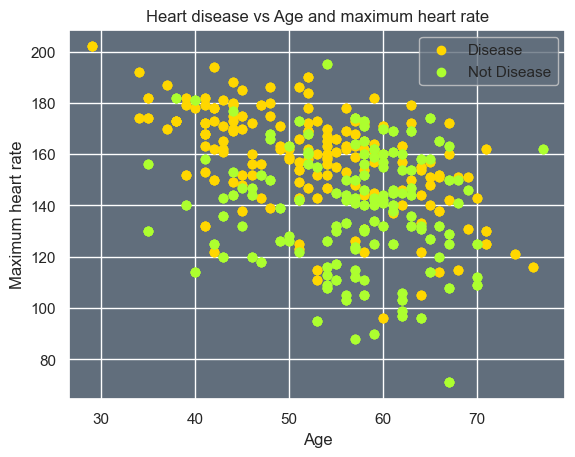

In [44]:
#create a scatter plot for heart disease vs age and maximum heart rate
plt.scatter(x=df.age[df.target ==1], y=df.thalach[df.target==1], c='#FFD700', label='Disease')
plt.scatter(x=df.age[df.target ==0], y=df.thalach[df.target==0], c='#ADFF2F', label='Not Disease')
#add a legend
plt.legend()
# add labels to the axes
plt.xlabel('Age')
plt.ylabel('Maximum heart rate')
# set the title
plt.title('Heart disease vs Age and maximum heart rate')
plt.show()

In [45]:
#create a logistic regression 
#create an independent variable and dependent variable
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [48]:
#normalize the data
x = (x_data - np.min(x_data))/np.max(x_data) - np.min(x_data)

In [49]:
#split the data(80%)for training and 20% for testing 
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0)

In [50]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Instantiate the Logistic Regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
accuracies = {}

accuracies['Logistic Regression'] = accuracy

print("Test Accuracy:", accuracy * 100)


Test Accuracy: 60.0


In [20]:
# importing the KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)

prediction = knn.predict(x_test)

accuracy = knn.score(x_test, y_test)
print("{} NN Score: {:.2f}%".format(2, accuracy * 100))


2 NN Score: 95.12%


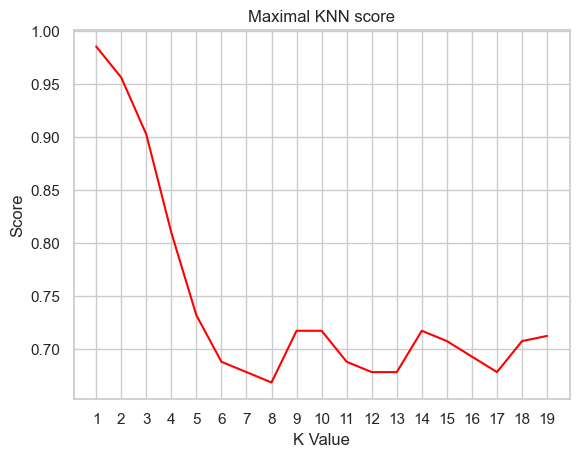

Maximum KNN score is 98.54%


In [81]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Assuming you have already loaded your data into numpy arrays: x and y
# If you are using pandas DataFrames, you can convert them to numpy arrays using .values

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the accuracies dictionary
accuracies = {}

score_list = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    score_list.append(knn.score(x_test, y_test))

# show using the line plot
plt.plot(range(1, 20), score_list, color='red')
plt.xticks(np.arange(1, 20, 1))
plt.xlabel('K Value')
plt.ylabel('Score')
plt.title('Maximal KNN score')
plt.show()

# get the maximum KNN score for the model in %
acc = max(score_list) * 100

accuracies['KNN'] = acc
print('Maximum KNN score is {:.2f}%'.format(acc))


In [82]:
#get test accuracy using the support vector machine (SVM) algorithm
from sklearn.svm import SVC
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

svm = SVC(random_state=1)
svm.fit(x_train, y_train)

# Calculate the test accuracy using the support vector machine (SVM) algorithm
acc = svm.score(x_train, y_train) * 100

accuracies['SVM'] = acc
print('Test Accuracy of SVM algorithm: {:.2f}%'.format(acc))


Test Accuracy of SVM algorithm: 72.32%


In [83]:
# accuracy using the naive Bayesian algorithm
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split


assert len(x) == len(y)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the Gaussian Naive Bayes classifier
nb = GaussianNB()
nb.fit(x_train, y_train)

# Calculate the accuracy on the test set
acc = nb.score(x_test, y_test) * 100
accuracies['Naive Bayes'] = acc

# Print the accuracy
print('Accuracy of Naive Bayes: {:.2f}'.format(acc))


Accuracy of Naive Bayes: 80.00


In [84]:
#get accuracy using decission tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

assert len(x) == len(y)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

# Calculate the accuracy on the test set
acc = dtc.score(x_test, y_test) * 100
accuracies['Decission tree'] = acc

# Print the accuracy
print('Decision Tree Test Accuracy: {:.2f}%'.format(acc))


Decision Tree Test Accuracy: 98.54%


In [85]:
#get accuracy of random forest classification algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

assert len(x) == len(y)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=1000, random_state=1)
rf.fit(x_train, y_train)

# Calculate the accuracy on the test set
acc = rf.score(x_test, y_test) * 100
accuracies['Random Forest'] = acc

# Print the accuracy
print('Random Forest Algorithm Accuracy Score: {:.2f}'.format(acc))


Random Forest Algorithm Accuracy Score: 98.54


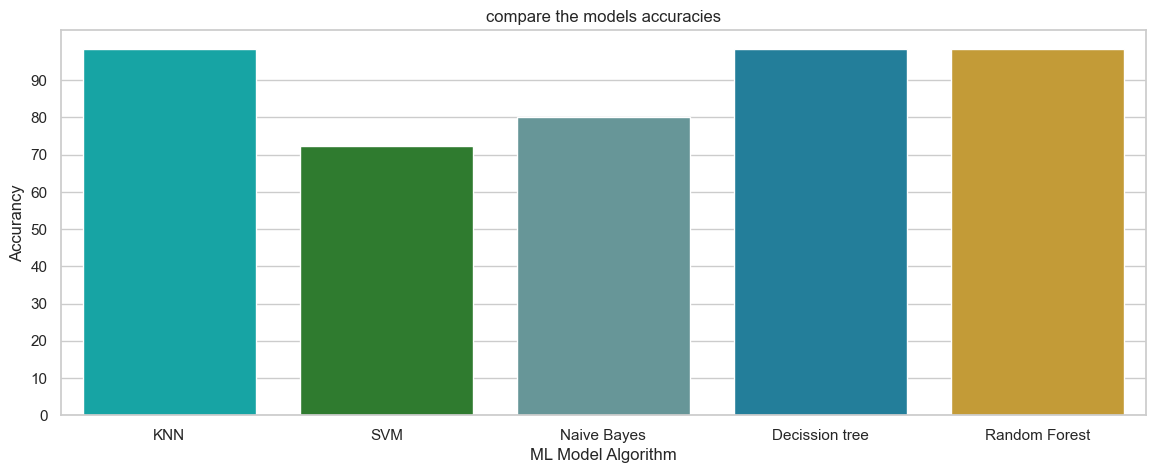

In [86]:
#compare the models accuracies
colors = ['#00BBBB', '#228822', '#5F9EA0', '#0F88AE', '#DAA520', '#CFC66E']

sns.set_style('whitegrid')
plt.figure(figsize=[14,5])
plt.yticks(np.arange(0,100,10))
plt.title('compare the models accuracies')
plt.ylabel('Accurancy')
plt.xlabel('ML Model Algorithm')
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()),palette=colors)
plt.show()

In [87]:
#confusion matrix : evaluate teh performance of classification model
# get confusion matrix to look at the inbalanced values
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


lr = LogisticRegression()
lr.fit(x_train, y_train)

knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(x_train, y_train)

svm = SVC()
svm.fit(x_train, y_train)

nb = GaussianNB()
nb.fit(x_train, y_train)

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

rf = RandomForestClassifier(n_estimators=1000, random_state=1)
rf.fit(x_train, y_train)

# Predictions
y_head_lr = lr.predict(x_test)
y_head_knn = knn3.predict(x_test)
y_head_svm = svm.predict(x_test)
y_head_nb = nb.predict(x_test)
y_head_dtc = dtc.predict(x_test)
y_head_rf = rf.predict(x_test)

# Confusion matrices
confusion_lr = confusion_matrix(y_test, y_head_lr)
confusion_knn = confusion_matrix(y_test, y_head_knn)
confusion_svm = confusion_matrix(y_test, y_head_svm)
confusion_nb = confusion_matrix(y_test, y_head_nb)
confusion_dtc = confusion_matrix(y_test, y_head_dtc)
confusion_rf = confusion_matrix(y_test, y_head_rf)

print("Confusion Matrix for Logistic Regression:")
print(confusion_lr)

print("Confusion Matrix for K-Nearest Neighbors:")
print(confusion_knn)

print("Confusion Matrix for Support Vector Machine:")
print(confusion_svm)

print("Confusion Matrix for Naive Bayes:")
print(confusion_nb)

print("Confusion Matrix for Decision Tree Classifier:")
print(confusion_dtc)

print("Confusion Matrix for Random Forest Classifier:")
print(confusion_rf)


Confusion Matrix for Logistic Regression:
[[54 48]
 [34 69]]
Confusion Matrix for K-Nearest Neighbors:
[[91 11]
 [ 9 94]]
Confusion Matrix for Support Vector Machine:
[[62 40]
 [25 78]]
Confusion Matrix for Naive Bayes:
[[72 30]
 [11 92]]
Confusion Matrix for Decision Tree Classifier:
[[102   0]
 [  3 100]]
Confusion Matrix for Random Forest Classifier:
[[102   0]
 [  3 100]]


In [89]:
# import module for confusion matrix
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, y_head_lr)
cm_knn = confusion_matrix(y_test, y_head_knn)
cm_nb = confusion_matrix(y_test, y_head_nb)
cm_dtc = confusion_matrix(y_test, y_head_dtc)
cm_rf = confusion_matrix(y_test, y_head_rf)


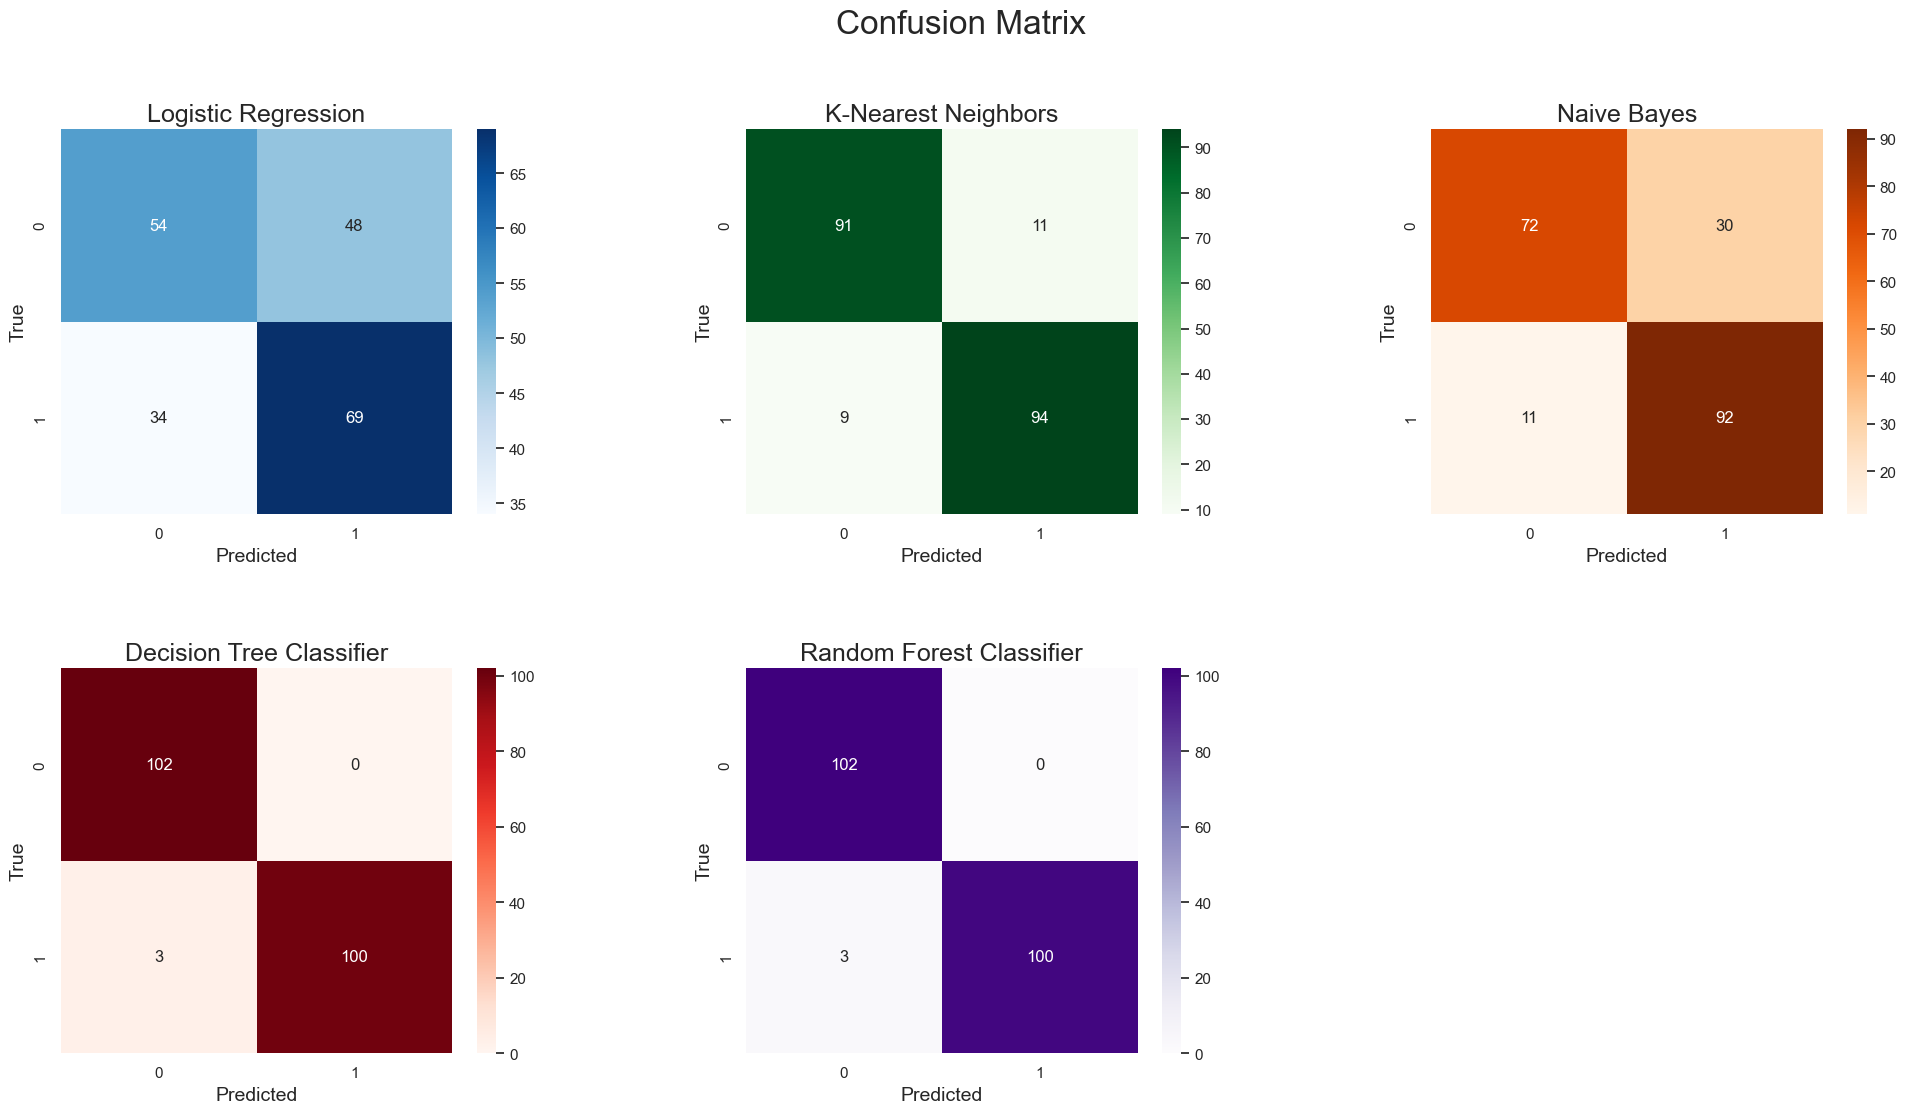

In [90]:
# ploting for heat map using confusion matrices
import seaborn as sns

# Assuming you already have the confusion matrices: cm_lr, cm_knn, cm_nb, cm_dtc, and cm_rf
# If not, please make sure to run the previous code to generate the confusion matrices.

# Plotting for heat map using confusion matrices
plt.figure(figsize=(24, 12))
plt.suptitle('Confusion Matrix', fontsize=24)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Plot for Logistic Regression
plt.subplot(2, 3, 1)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression", fontsize=18)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)

# Plot for K-Nearest Neighbors
plt.subplot(2, 3, 2)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Greens")
plt.title("K-Nearest Neighbors", fontsize=18)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)

# Plot for Naive Bayes
plt.subplot(2, 3, 3)
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Oranges")
plt.title("Naive Bayes", fontsize=18)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)

# Plot for Decision Tree Classifier
plt.subplot(2, 3, 4)
sns.heatmap(cm_dtc, annot=True, fmt="d", cmap="Reds")
plt.title("Decision Tree Classifier", fontsize=18)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)

# Plot for Random Forest Classifier
plt.subplot(2, 3, 5)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Purples")
plt.title("Random Forest Classifier", fontsize=18)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)

plt.show()
